# 1.4.2 Image Thresholding

# Simple Thresholding

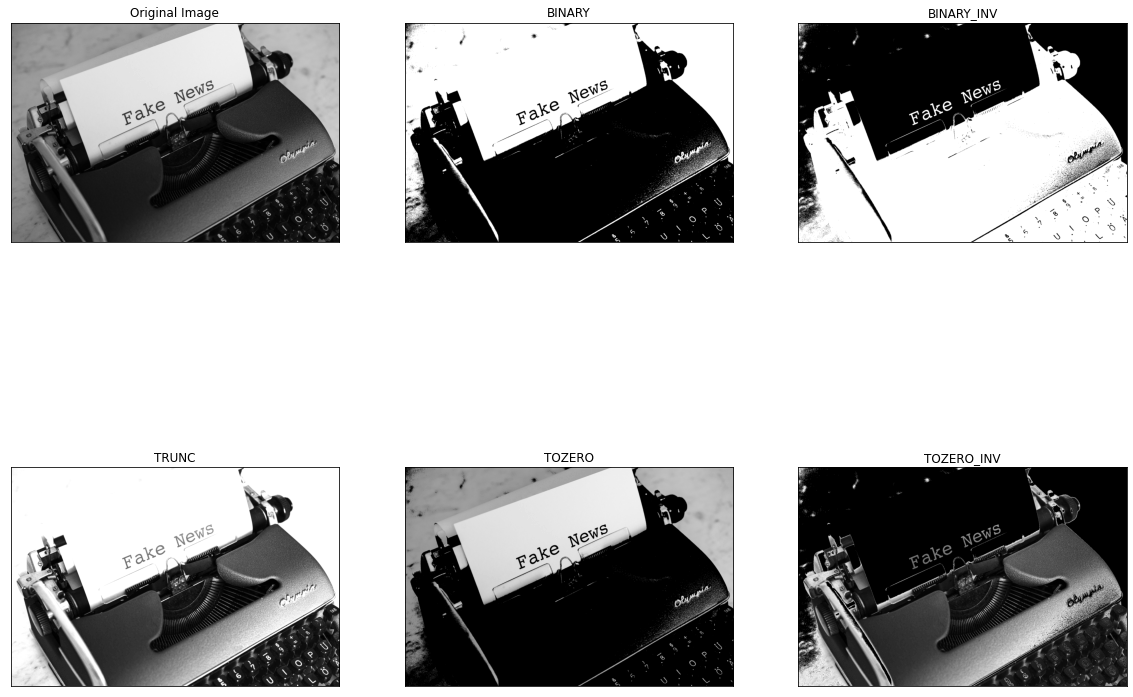

In [1]:
#영상처리에서 아주 중요한 부분

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('img1.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [2]:
h, w = 256, 512
img = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

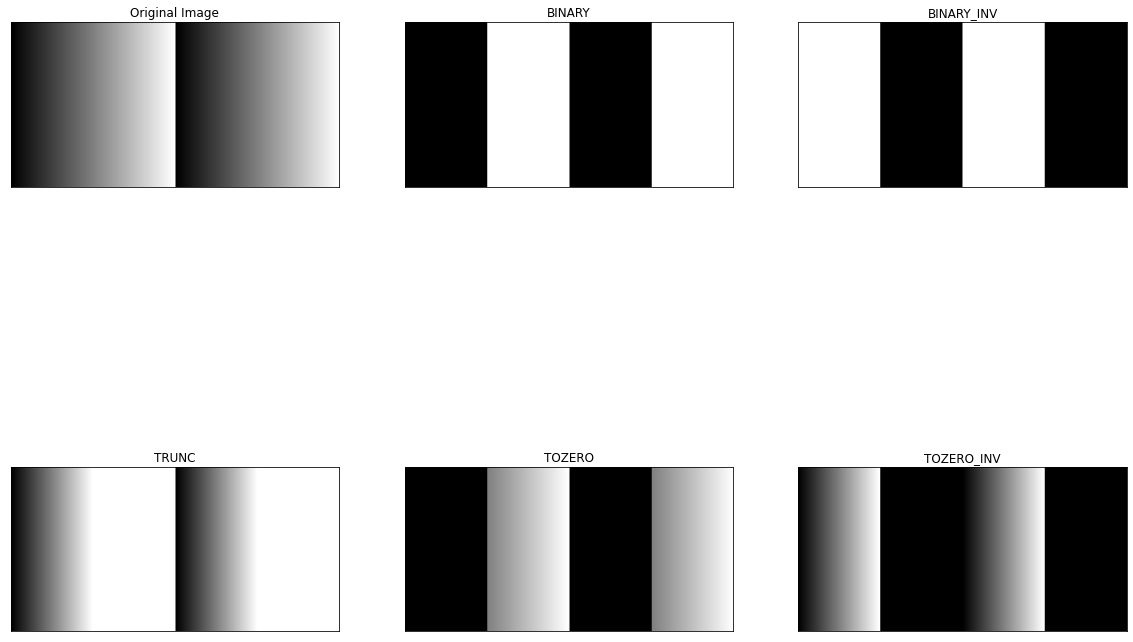

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)  # x 축이127(중앙쯤) 127보다 크면 255로 작으면 0으로
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)  #Binary 반대로
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)   #127이상을 255로
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)  #Trunc 반대로
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)  #Tozero반대로
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# Adaptive Thresholding

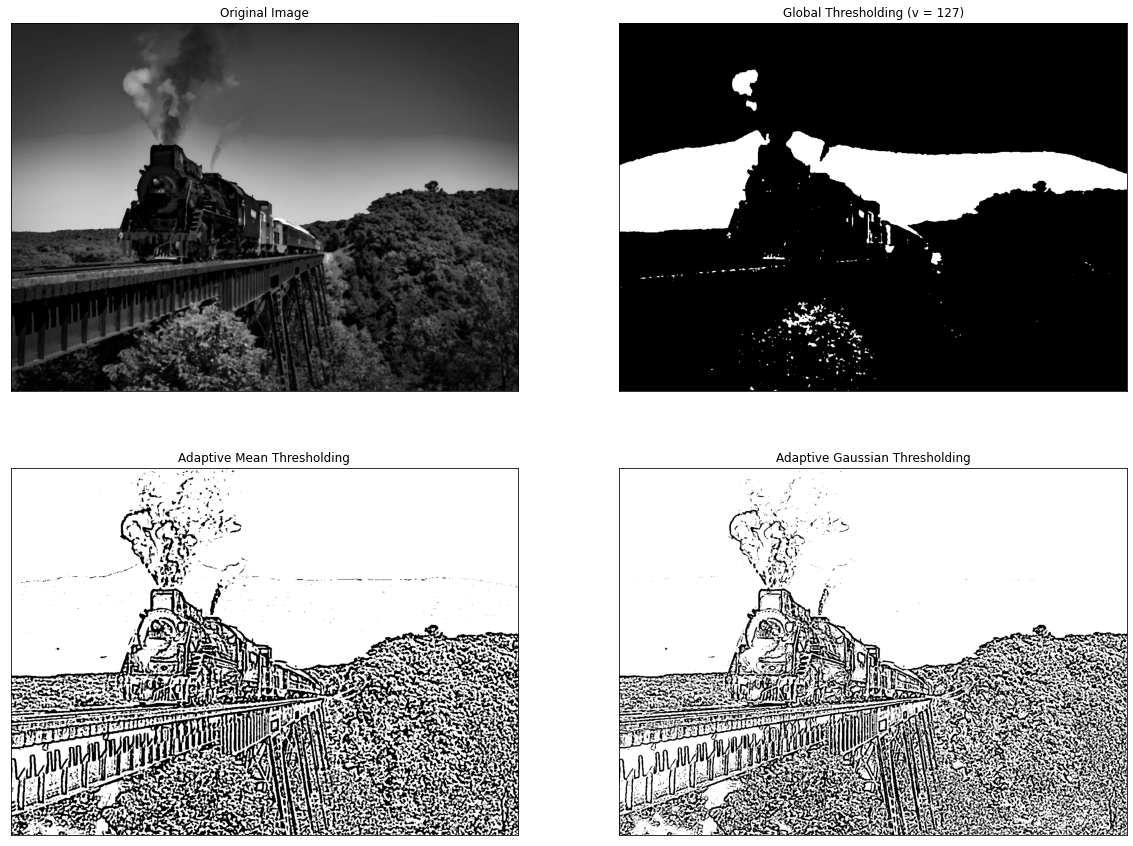

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img3.jpg',0)
img = cv2.medianBlur(img,5) #그림자없애줌

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
#                                         mean                                  BlockSize(고칠수있음)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]
plt.figure(figsize=(20,15))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# Otsu’s Binarization

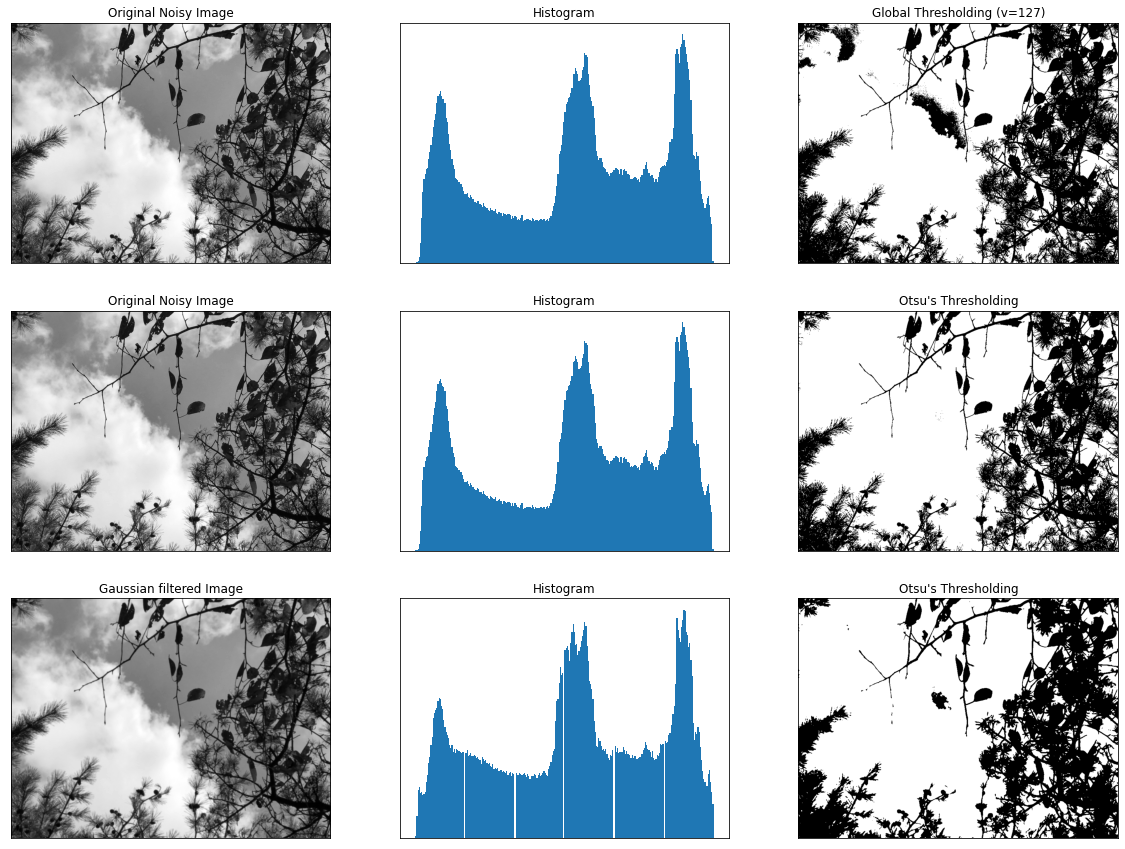

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sIMG4.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
        'Original Noisy Image','Histogram',"Otsu's Thresholding",
        'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    #                       히스토그램그림
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


# Histogram

In [7]:
img = cv2.imread('sIMG4.jpg',0)
h,w = img.shape
hist = np.zeros(256, np.uint32)

for i in range(h):
    for j in range(w):
        hist[img[i,j]] += 1
        

In [8]:
hist

array([   1,   14,   56,  193,  634, 1413, 2266, 2679, 2843, 2986, 3021,
       3298, 3533, 3774, 4029, 4340, 4559, 4751, 5101, 5323, 5401, 5489,
       5337, 5243, 5221, 5095, 4626, 4510, 4127, 3796, 3586, 3319, 3113,
       2980, 2709, 2665, 2628, 2585, 2506, 2510, 2403, 2283, 2193, 2200,
       2230, 2110, 2076, 2151, 2099, 2043, 1951, 1935, 1917, 1986, 1973,
       1879, 1856, 1794, 1906, 1803, 1764, 1744, 1688, 1647, 1737, 1698,
       1688, 1646, 1709, 1594, 1569, 1619, 1630, 1594, 1489, 1587, 1570,
       1549, 1532, 1564, 1545, 1529, 1411, 1504, 1433, 1503, 1454, 1379,
       1403, 1350, 1444, 1510, 1341, 1362, 1371, 1393, 1399, 1384, 1374,
       1342, 1441, 1402, 1324, 1376, 1362, 1344, 1349, 1383, 1390, 1355,
       1391, 1338, 1374, 1408, 1346, 1431, 1504, 1645, 1817, 1909, 2135,
       2446, 2838, 3458, 3570, 3760, 4095, 4499, 4805, 5079, 5123, 5258,
       5278, 5420, 5576, 6033, 6043, 6218, 6119, 6012, 5810, 5829, 5907,
       6159, 6261, 6703, 6635, 6576, 6035, 5678, 53

# Exercise Draw Histogram

In [9]:
import cv2
import numpy as np

h,w,ch = 256,512,3
hist2 = np.zeros((h,w,3),np.uint8)

for i in range(256):
    l = (int)((hist[i]/10000)*255)
    hist2 = cv2.rectangle(hist2,(i*2,h-0),(i*2+2,h-l),(0,255,0),1)


In [10]:
cv2.imshow('image',hist2)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

# with Noise

In [45]:
h, w = 256, 512
img = np.zeros((h,w), np.uint8)
for i in range(h):
    for j in range(w):
        img[i,j]=(j)%256

In [46]:
cv2.imshow('img',img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
for i in range((int)(h/2)):
    for j in range((int)(w/2)):
        img[i+int(h/4),j+int(w/4)] = 32

In [48]:
import random

noiseImg = np.copy(img)  
m = 64
for i in range(h):
    for j in range(w):
        value = noiseImg[i,j]+random.randint(-m, m)
        if value < 0:
            noiseImg[i,j] = 0
        elif value > 255:
            noiseImg[i,j] = 255
        else :
            noiseImg[i,j] = value

In [49]:
cv2.imshow('noiseImage',noiseImg)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

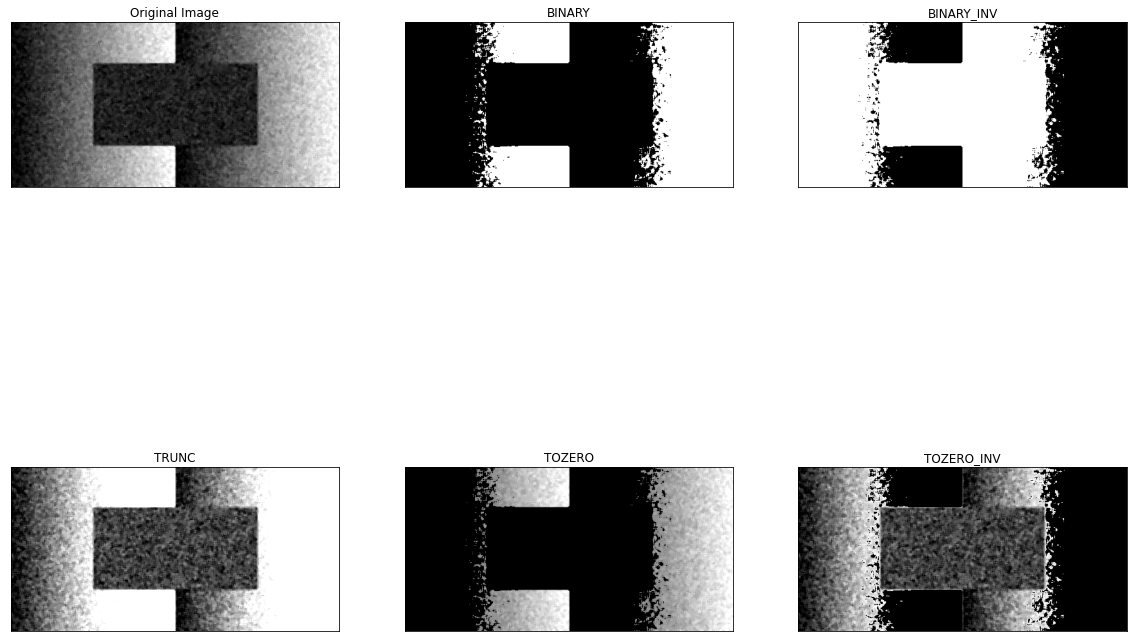

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

ret,thresh1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)  # x 축이127(중앙쯤) 127보다 크면 255로 작으면 0으로
ret,thresh2 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY_INV)  #Binary 반대로
ret,thresh3 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TRUNC)   #127이상을 255로
ret,thresh4 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO)  #Trunc 반대로
ret,thresh5 = cv2.threshold(noiseImg,127,255,cv2.THRESH_TOZERO_INV)  #Tozero반대로
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [noiseImg, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,15))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

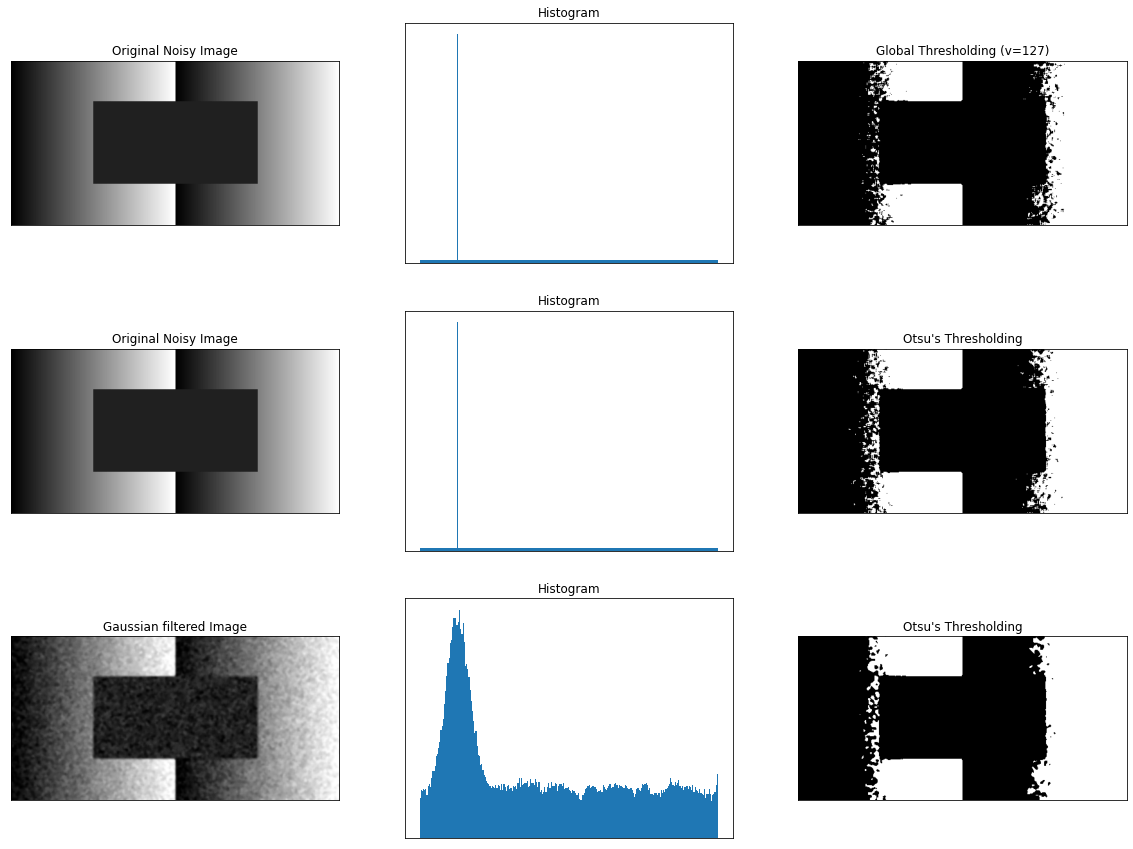

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# global thresholding
ret1,th1 = cv2.threshold(noiseImg,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(noiseImg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noiseImg,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
        'Original Noisy Image','Histogram',"Otsu's Thresholding",
        'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    #                       히스토그램그림
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()